In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv(r"C:\Users\User\Desktop\Pythonude\movielens\movies.csv", sep = ",")

In [3]:
movies

movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
62418                                        Drama  
62419                                  Documentary  
62420                                 Comedy|Drama  
62421                           (no genres listed)  
62422                       Action|Adventure|Drama  

[62423 rows x 3 columns]

In [4]:
movies.head(10)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8                                       Action  
9                    Action|Adventure|Thriller

In [5]:
print(type(movies))

<class 'pandas.core.frame.DataFrame'>


In [6]:
tags = pd.read_csv(r"C:\Users\User\Desktop\Pythonude\movielens/tags.csv", sep = ",")

In [7]:
tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [8]:
ratings = pd.read_csv(r"C:\Users\User\Desktop\Pythonude\movielens/ratings.csv", sep = ",")

In [9]:
ratings.head(5)

userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

In [10]:
del ratings["timestamp"]
del tags["timestamp"]

# Data Structure

### Series

In [11]:
#  extract 0th row, notice that it is infact a series
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [12]:
print(row_0)

userId           3
movieId        260
tag        classic
Name: 0, dtype: object


In [13]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [14]:
row_0["userId"]

3

In [15]:
"rating"  in row_0

False

In [16]:
row_0.name

0

In [17]:
row_0 = row_0.rename("first_row")

In [18]:
row_0.name

'first_row'

### Data Frame

In [19]:
tags.head()

userId  movieId               tag
0       3      260           classic
1       3      260            sci-fi
2       4     1732       dark comedy
3       4     1732    great dialogue
4       4     7569  so bad it's good

In [20]:
tags.index

RangeIndex(start=0, stop=1093360, step=1)

In [21]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [22]:
# Extract row_0 ,12,2000 from DataFrame
tags.iloc[[0,12,2000]]

userId  movieId           tag
0          3      260       classic
12         4   164909       musical
2000     647   164179  twist ending

# Descriptive Stastics

In [23]:
ratings["rating"].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [24]:
ratings["rating"].mean()

3.533854451353085

In [25]:
ratings.describe()

userId       movieId        rating
count  2.500010e+07  2.500010e+07  2.500010e+07
mean   8.118928e+04  2.138798e+04  3.533854e+00
std    4.679172e+04  3.919886e+04  1.060744e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    4.051000e+04  1.196000e+03  3.000000e+00
50%    8.091400e+04  2.947000e+03  3.500000e+00
75%    1.215570e+05  8.623000e+03  4.000000e+00
max    1.625410e+05  2.091710e+05  5.000000e+00

In [26]:
ratings.mean()

userId     81189.281154
movieId    21387.981943
rating         3.533854
dtype: float64

In [27]:
ratings["rating"].min()

0.5

In [28]:
ratings["rating"].max()

5.0

In [29]:
ratings["rating"].std()

1.0607439610179747

In [30]:
ratings["rating"].mode()

0    4.0
dtype: float64

In [31]:
ratings.corr()

userId   movieId    rating
userId   1.000000 -0.004413  0.001940
movieId -0.004413  1.000000 -0.009216
rating   0.001940 -0.009216  1.000000

In [32]:
filter_1 = ratings["rating"] > 5
filter_1
# type(filter_1)
# filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
25000090    False
25000091    False
25000092    False
25000093    False
25000094    False
Name: rating, Length: 25000095, dtype: bool

In [33]:
filter_2 = ratings["rating"] > 0
filter_2.all()

True

## Data Cleaning : Handling Missing Data

In [34]:
movies.shape


(62423, 3)

In [35]:
# is any row NULL?
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

That is nice ,which means we dont have null value

In [36]:
# is any row NUll?
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [37]:
# is any row NULL
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [45]:
tags.shape

(1093344, 3)

In [46]:
tags = tags.dropna()
# which helps us on droping rows with nan ,zero,empty values

here we have some missing value

 lets check again whether we still have missing value

In [47]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [48]:
tags.shape

(1093344, 3)

# Data Visiualazation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8875E1A48>]],
      dtype=object)

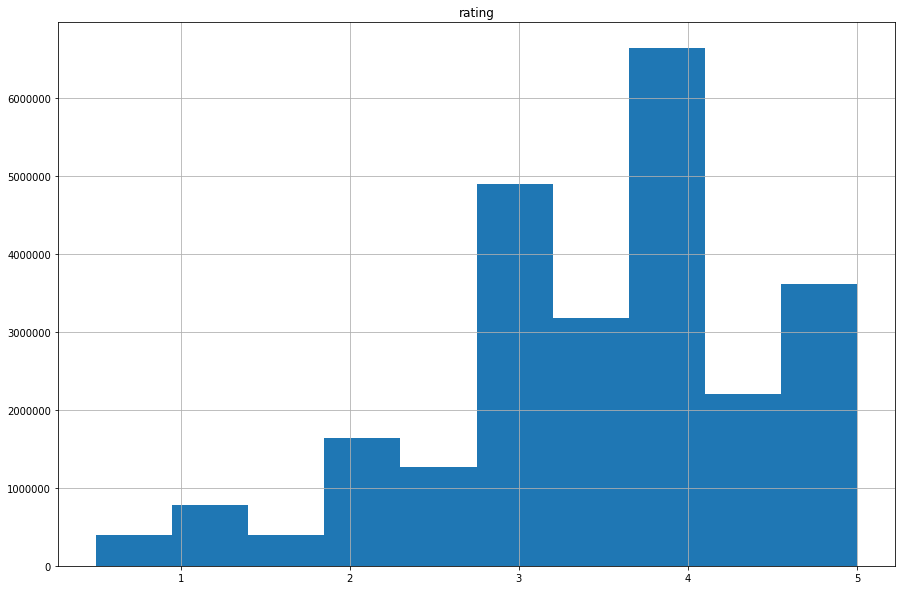

In [51]:
%matplotlib inline

ratings.hist(column = "rating", figsize = (15,10))

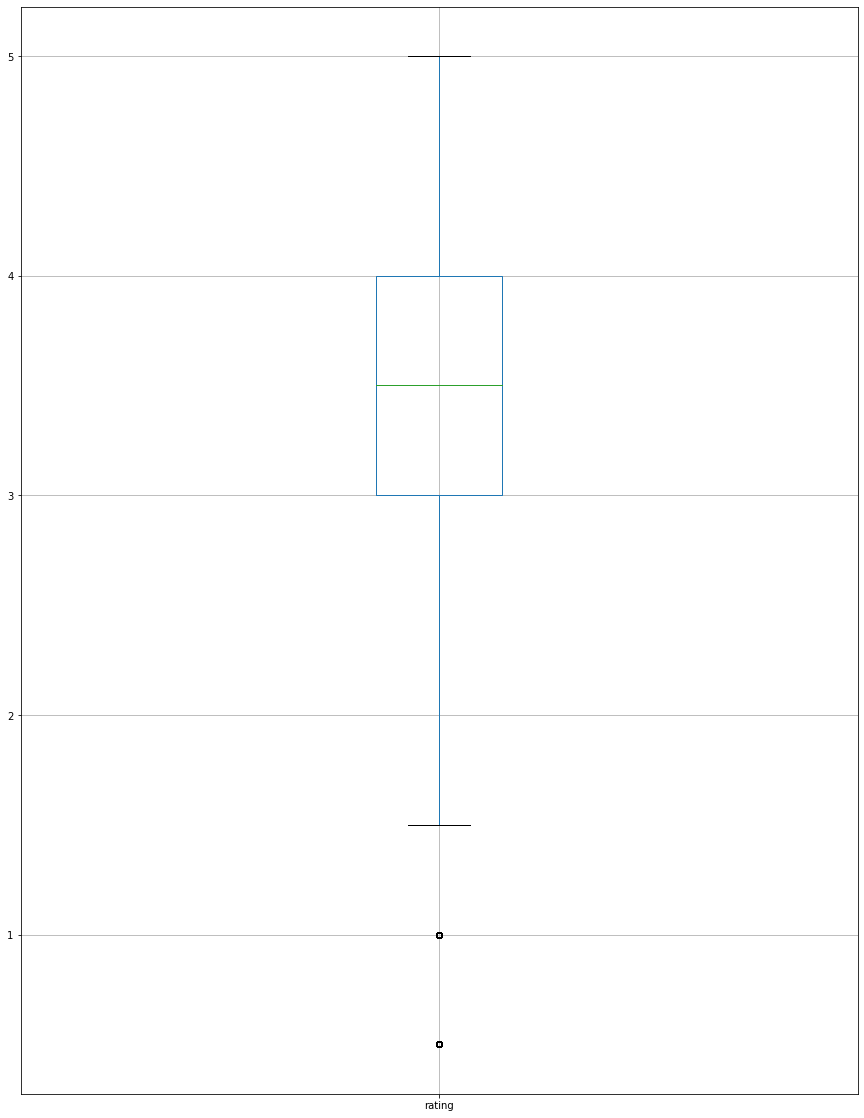

In [53]:
ratings.boxplot(column = "rating", figsize =(15,20))

### Slicing Out Columns

In [54]:
tags["tag"].head()

0             classic
1              sci-fi
2         dark comedy
3      great dialogue
4    so bad it's good
Name: tag, dtype: object

In [56]:
movies[["title","genres"]].head()

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [58]:
ratings[-10:]


userId  movieId  rating
25000085  162541     8983     4.5
25000086  162541    31658     4.5
25000087  162541    33794     4.0
25000088  162541    41566     4.0
25000089  162541    45517     4.5
25000090  162541    50872     4.5
25000091  162541    55768     2.5
25000092  162541    56176     2.0
25000093  162541    58559     4.0
25000094  162541    63876     5.0

In [60]:
tags_counts = tags["tag"].value_counts()
tags_counts[:10]

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
Name: tag, dtype: int64

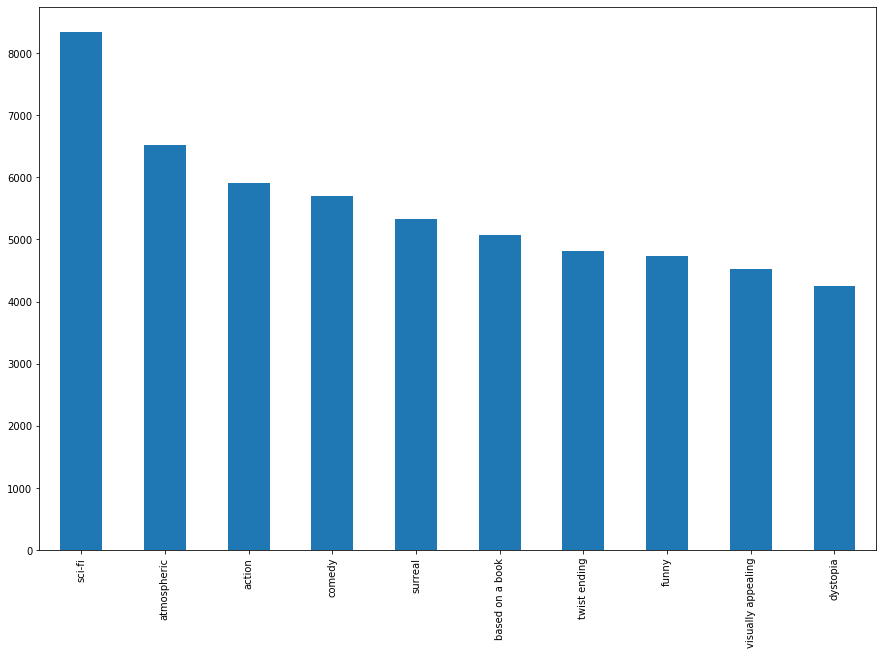

In [61]:
tags_counts[:10].plot(kind = "bar", figsize = (15,10))

In [62]:
tags_counts[-10:]

Look at my shit!          1
gay couples               1
Fumihiko Sori             1
pack of money             1
creepy talking animals    1
Bela Lugosi wannabe       1
circus clown              1
Writer: John Glenn        1
frivilous                 1
farts                     1
Name: tag, dtype: int64

### Filters for Selecting Rows

In [65]:
is_highly_rated = ratings["rating"] >= 4.0
is_highly_rated

0            True
1           False
2            True
3            True
4           False
            ...  
25000090     True
25000091    False
25000092    False
25000093     True
25000094     True
Name: rating, Length: 25000095, dtype: bool

In [66]:
ratings[is_highly_rated][30:50]

userId  movieId  rating
49       1     7365     4.0
54       1     7940     4.5
56       1     8154     5.0
57       1     8327     5.0
58       1     8360     4.0
62       1     8786     4.0
64       1     8973     4.0
66       1    27266     4.5
69       1    32591     5.0
72       2      110     5.0
73       2      150     4.0
74       2      151     4.5
75       2      236     4.0
76       2      260     5.0
79       2      318     5.0
80       2      333     5.0
81       2      349     4.5
82       2      356     4.5
83       2      364     4.5
85       2      457     5.0

In [68]:
is_animation = movies["genres"].str.contains("Animation")
movies[is_animation][5:15]

movieId                                       title  \
309      313                   Swan Princess, The (1994)   
359      364                       Lion King, The (1994)   
387      392  Secret Adventures of Tom Thumb, The (1993)   
545      551      Nightmare Before Christmas, The (1993)   
551      558                      Pagemaster, The (1994)   
580      588                              Aladdin (1992)   
586      594      Snow White and the Seven Dwarfs (1937)   
587      595                 Beauty and the Beast (1991)   
588      596                            Pinocchio (1940)   
602      610                          Heavy Metal (1981)   

                                              genres  
309                               Animation|Children  
359  Adventure|Animation|Children|Drama|Musical|IMAX  
387                              Adventure|Animation  
545               Animation|Children|Fantasy|Musical  
551      Action|Adventure|Animation|Children|Fantasy  
580      Adventure|Animation|Children|Comedy|Musical  
586         Animation|Children|Drama|Fantasy|Musical  
587  Animation|Children|Fantasy|Musical|Romance|IMAX  
588               Animation|Children|Fantasy|Musical  
602         Action|Adventure|Animation|Horror|Sci-Fi

In [69]:
movies[is_animation].head()

movieId                    title  \
0          1         Toy Story (1995)   
12        13             Balto (1995)   
47        48        Pocahontas (1995)   
236      239    Goofy Movie, A (1995)   
241      244  Gumby: The Movie (1995)   

                                          genres  
0    Adventure|Animation|Children|Comedy|Fantasy  
12                  Adventure|Animation|Children  
47      Animation|Children|Drama|Musical|Romance  
236            Animation|Children|Comedy|Romance  
241                           Animation|Children

### Group By and Aggregation

In [71]:
ratings_counts = ratings[["movieId","rating"]].groupby("rating").count()
ratings_counts

movieId
rating         
0.5      393068
1.0      776815
1.5      399490
2.0     1640868
2.5     1262797
3.0     4896928
3.5     3177318
4.0     6639798
4.5     2200539
5.0     3612474

In [76]:
average_rating =ratings[["movieId", "rating"]].groupby("movieId").mean()
average_rating.head()

rating
movieId          
1        3.893708
2        3.251527
3        3.142028
4        2.853547
5        3.058434

In [78]:
movie_count = ratings[["movieId" ,"rating"]].groupby("movieId").count()
movie_count.head()

rating
movieId        
1         57309
2         24228
3         11804
4          2523
5         11714

In [79]:
movie_count = ratings[["movieId" ,"rating"]].groupby("movieId").count()
movie_count.tail()

rating
movieId        
209157        1
209159        1
209163        1
209169        1
209171        1

# Pandas Merge DataFrame

In [80]:
tags.head()

userId  movieId               tag
0       3      260           classic
1       3      260            sci-fi
2       4     1732       dark comedy
3       4     1732    great dialogue
4       4     7569  so bad it's good

In [81]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [83]:
t = movies.merge(tags, on = "movieId", how = "inner")
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId           tag  
0     791         Owned  
1    1048  imdb top 250  
2    1361         Pixar  
3    3164         Pixar  
4    3164   time travel

### Combine aggreagation,merging and filters to get useful analytics

In [90]:
avg_ratings = ratings.groupby("movieId", as_index = False).mean()
del avg_ratings["userId"]
avg_ratings.head()

movieId    rating
0        1  3.893708
1        2  3.251527
2        3  3.142028
3        4  2.853547
4        5  3.058434

In [88]:
box_office = movies.merge(avg_ratings, on = "movieId", how = "inner")
box_office.tail()

movieId                           title                  genres  rating
59042   209157                       We (2018)                   Drama     1.5
59043   209159       Window of the Soul (2001)             Documentary     3.0
59044   209163                Bad Poems (2018)            Comedy|Drama     4.5
59045   209169             A Girl Thing (2001)      (no genres listed)     3.0
59046   209171  Women of Devil's Island (1962)  Action|Adventure|Drama     3.0

In [92]:
is_highly_rated = box_office["rating"] >= 4.0
is_highly_rated

0        False
1        False
2        False
3        False
4        False
         ...  
59042    False
59043    False
59044     True
59045    False
59046    False
Name: rating, Length: 59047, dtype: bool

In [93]:
box_office[is_highly_rated][-5:]

movieId                                              title  \
59027   209121        Adrenalin: The BMW Touring Car Story (2014)   
59028   209123  Square Roots: The Story of SpongeBob SquarePan...   
59029   209129                           Destination Titan (2011)   
59041   209155                         Santosh Subramaniam (2008)   
59044   209163                                   Bad Poems (2018)   

                      genres  rating  
59027            Documentary     4.0  
59028            Documentary     4.0  
59029            Documentary     4.5  
59041  Action|Comedy|Romance     5.0  
59044           Comedy|Drama     4.5

In [99]:
is_comedy = box_office["genres"].str.contains("comedy")
box_office[is_comedy]

Empty DataFrame
Columns: [movieId, title, genres, rating]
Index: []

In [100]:
box_office[is_comedy & is_highly_rated][-5:]

Empty DataFrame
Columns: [movieId, title, genres, rating]
Index: []